In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import scipy.signal as ss
from datetime import datetime

In [2]:
%matplotlib notebook

In [3]:
dd = pd.read_csv('train.csv')
dd.epoch = pd.to_datetime(dd.epoch)
dd.epoch = dd.epoch.apply(datetime.timestamp)
dd.epoch = dd.epoch - np.min(dd.epoch)

In [24]:
dd0 = dd[dd['sat_id']==37]
time = []
first = True
for i in dd0.index:
    if not first:
        if (dd0.epoch[i]-dd0.epoch[i-1] > 0.01):
            time.append(dd0.epoch[i]-dd0.epoch[i-1])
    else:
        first = False
time = np.array(time)
print("Mean: {}, Std. Deviation: {}".format(np.mean(time), np.std(time)))
fs = np.mean(time)

Mean: 1230.1314134129045, Std. Deviation: 0.0004924451740804003


<IPython.core.display.Javascript object>


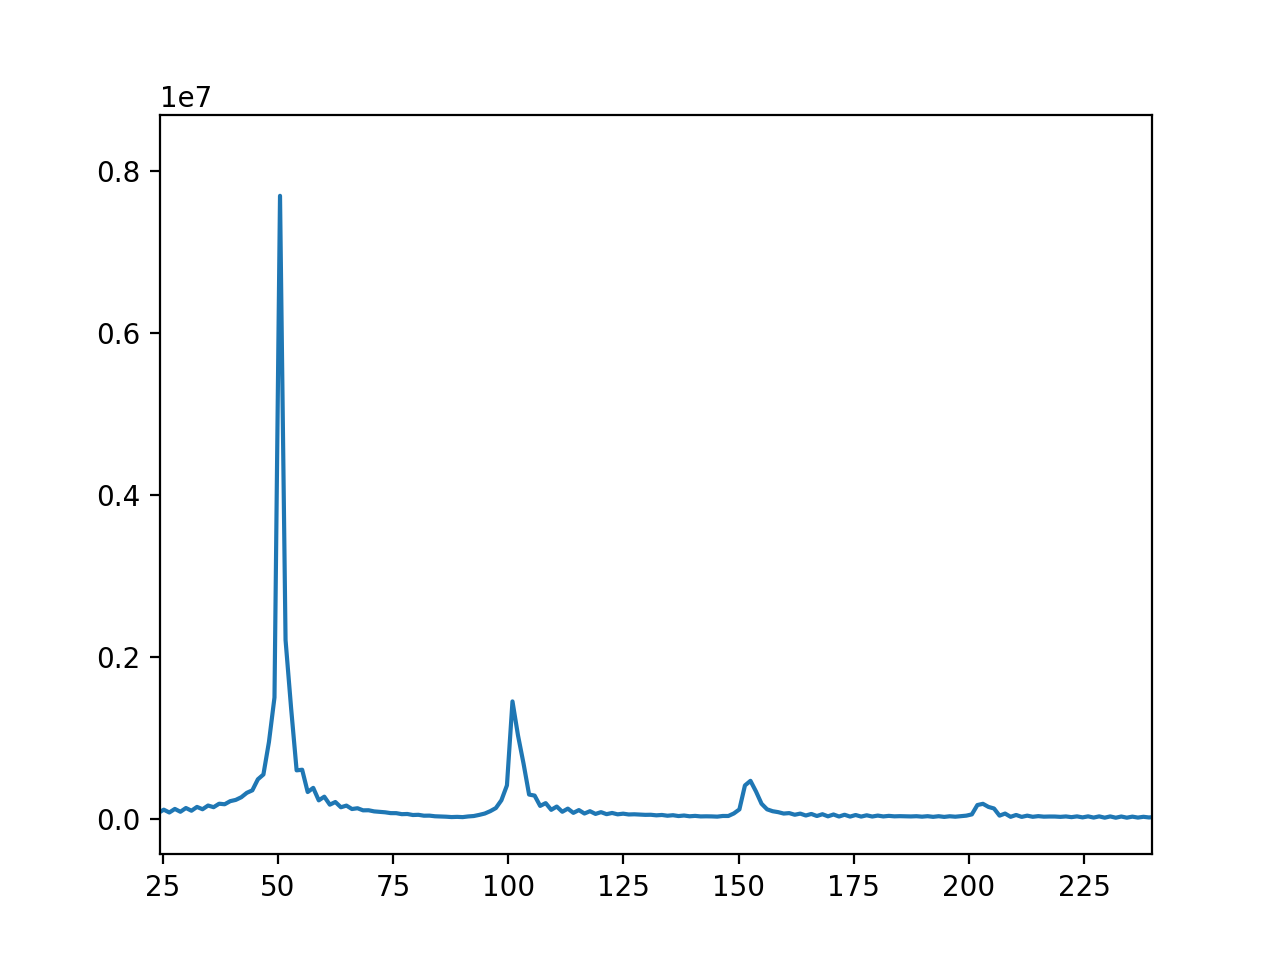

In [26]:
N = 1024
DD0x = fft(dd0.x, N)
plt.figure(0)
plt.plot(np.arange(N)/N*fs, abs(DD0x))

In [236]:
dd0.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,0.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2803.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,5606.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,8409.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,11212.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [335]:
decayv = []
diffv = []
for k in range(600):
    dd0 = dd[dd['sat_id']==k]
    T = 1
    r = 10000
    l = 0
    while (abs(r-l) > 0.01 and T == 1):
        m = np.argmax(dd0.Vx)
        mins = []
        for i in list(dd0.index):
            if (abs(dd0.Vx[i]-dd0.Vx[m]) < (l+r)/2):
                mins.append(i)
        per = []
        for i in range(1, len(mins)):
            per.append(mins[i]-mins[i-1])
        if (len(per) != 0):
            T = max(set(per), key=per.count) 
            r = (l+r)/2
        else:
            l = (l+r)/2
    if (T != 24 and T != 1):
        print("k:", k, "period:", T)
        diffv.append(k)
    elif (T == 1):
        decayv.append(k)

k: 5 period: 23
k: 8 period: 23
k: 54 period: 23
k: 60 period: 23
k: 70 period: 23
k: 77 period: 23
k: 95 period: 23
k: 99 period: 23
k: 127 period: 23
k: 154 period: 23
k: 156 period: 23
k: 159 period: 23
k: 176 period: 23
k: 179 period: 23
k: 209 period: 23
k: 225 period: 23
k: 262 period: 23
k: 273 period: 23
k: 308 period: 23
k: 316 period: 23
k: 333 period: 23
k: 337 period: 23
k: 339 period: 23
k: 347 period: 23
k: 356 period: 23
k: 372 period: 23
k: 379 period: 23
k: 386 period: 23
k: 438 period: 23
k: 442 period: 23
k: 445 period: 23
k: 458 period: 23
k: 474 period: 23
k: 482 period: 23
k: 504 period: 25
k: 511 period: 23
k: 523 period: 23
k: 524 period: 25
k: 544 period: 23
k: 555 period: 23
k: 556 period: 23
k: 571 period: 23
k: 587 period: 23
k: 599 period: 23


In [334]:
dd0 = dd[dd['sat_id']==54]
T = 1
r = 100000
l = 0
while (abs(r-l) > 0.1 and T == 1):
    m = np.argmax(dd0.Vx)
    mins = []
    for i in list(dd0.index):
        if (abs(dd0.Vx[i]-dd0.Vx[m]) < (l+r)/2):
            mins.append(i)
    per = []
    for i in range(1, len(mins)):
        per.append(mins[i]-mins[i-1])
    if (len(per) != 0):
        T = max(set(per), key=per.count) 
        r = (l+r)/2
        if (T != 24):
            T = 1
    else:
        l = (l+r)/2
print(T, r, l)

24 0.19073486328125 0


In [333]:
dd0 = dd[dd['sat_id']==54]
m = np.argmax(dd0.x)
mins = []
for i in list(dd0.index):
    if (abs(dd0.x[i]-dd0.x[m]) < 6):
        mins.append(i)
per = []
for i in range(1, len(mins)):
    per.append(mins[i]-mins[i-1])
if (len(per) != 0):
    T = max(set(per), key=per.count)
else:
    print("cero")
print(T)

cero
23


<IPython.core.display.Javascript object>


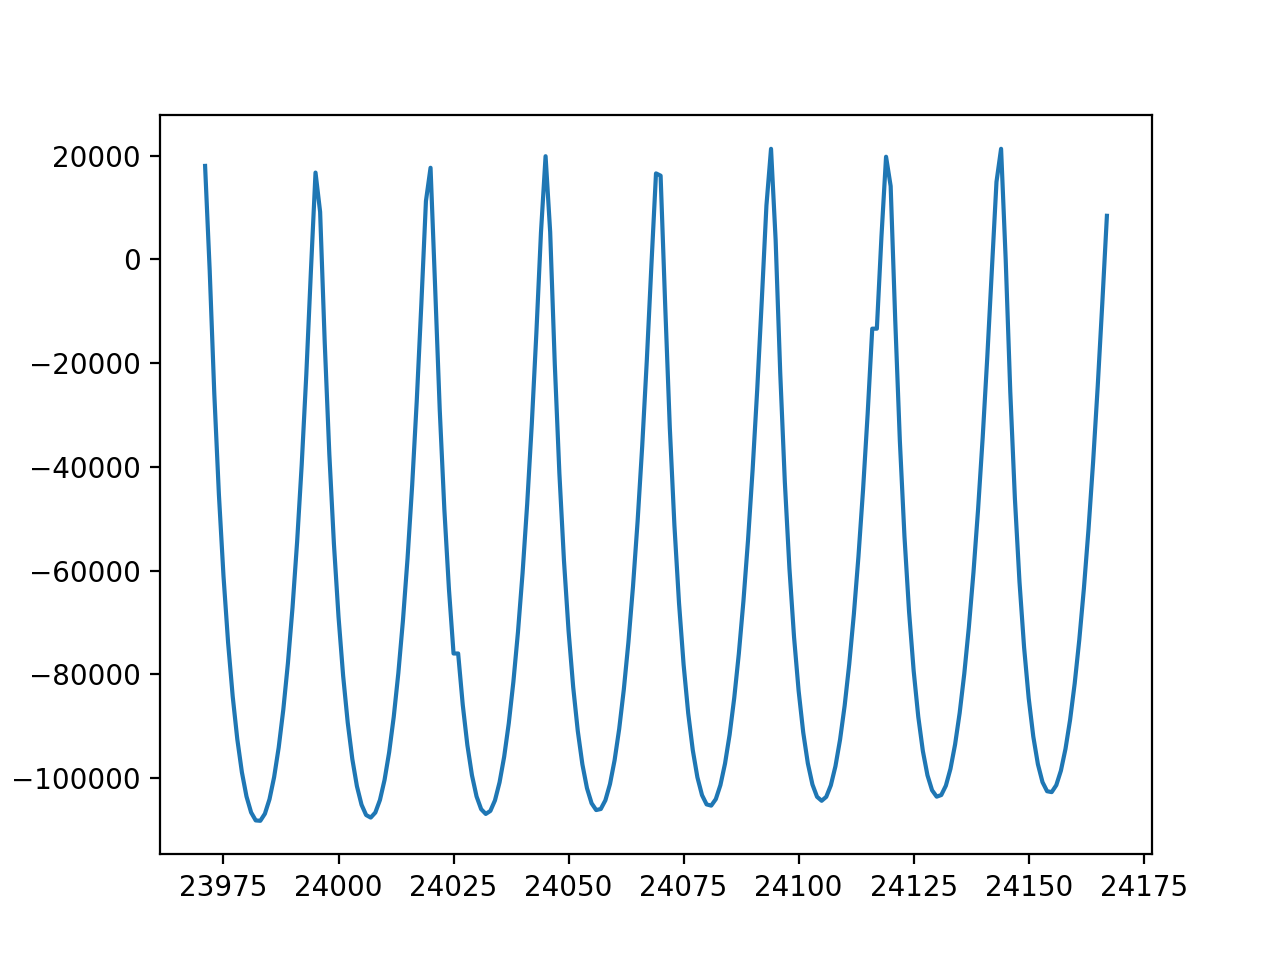

In [297]:
plt.figure(2)
plt.plot(dd[dd['sat_id']==20].x)

In [304]:
decay

[26,
 28,
 56,
 92,
 106,
 113,
 154,
 179,
 225,
 252,
 277,
 310,
 333,
 347,
 375,
 447,
 460,
 471,
 515,
 530,
 532,
 544,
 556]

In [336]:
len(decay)-23

41

In [319]:
diff = [5,20,54,80,81,91,127,147,156,160,187,195,199,218,224,232,239,273,287,307,312,316,358,372,383,387,464,465,513,523,526,534,555,562,587]
len(diff)

35

In [337]:
len(diffv)

44